## Decision-Tree Classifier Tutorial
https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('../datasets/car_evaluation.csv', header=None)

In [35]:
df.head()


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [37]:
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,5more,4,small,high,unacc
freq,432,432,432,576,576,576,1210


In [38]:
df.shape

(1728, 7)

In [39]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [40]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [41]:
df.head()
# doors and persons are categorical

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [42]:
for col in col_names:
    print(df[col].value_counts())

high     432
vhigh    432
low      432
med      432
Name: buying, dtype: int64
high     432
vhigh    432
low      432
med      432
Name: maint, dtype: int64
5more    432
4        432
2        432
3        432
Name: doors, dtype: int64
4       576
2       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
high    576
low     576
med     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [43]:
# target variable
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [44]:
# check missing numbers
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [45]:
# drop target variable

X = df.drop(['class'], axis=1)
y = df['class']

In [46]:
# split the data into test and train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [47]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

## Feature Engineering

In [48]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [49]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [50]:
!pip install --upgrade category_encoders

  Using cached numpy-1.22.4-cp38-cp38-macosx_10_15_x86_64.whl (17.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1


In [53]:
!pip install --upgrade numpy

  Using cached numpy-1.24.1-cp38-cp38-macosx_10_9_x86_64.whl (19.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.


In [54]:
# import category encoders
import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors',
                                 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

AttributeError: module 'numpy' has no attribute 'MachAr'

In [ ]:
X_train.head()

In [ ]:
X_test.head()

## Decision Tree Classifier with crterion gini index

In [ ]:
# import DeisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [ ]:
# fit the model
clf_gini.fit(X_train, y_train)

In [ ]:
# predict the test set results with criterion gini index

y_pred_gini = clf_gini.predict(X_test)

check accuracy score with criterion gini index

In [ ]:
from sklearn.metrics import accuracy_score
# y_pred_gini (test-set)
print('Model accuraci with criterion gini index: {0:04f}'.format(accuracy_score(y_test, y_pred_gini)))

Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

I will compare train set and test set accuracy to check for overfitting

In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

In [ ]:
print('Training set score: {0:04f}'.format(accuracy_score(y_train, y_pred_train_gini)))

In [ ]:
print('Test set score: {0:04f}'.format(accuracy_score(y_test, y_pred_gini)))

Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

## visualize decision-trees

In [ ]:
plt.figure(figsize=(12, 8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

### Visualize decision-trees with graphviz

In [ ]:

import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file = None,
                               feature_names=X_train.columns,
                               class_names = y_train,
                               filled=True,
                               rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

## Decisiion Tree Classifier with criterion entropy

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

### Predict the test set results with criterion entropy

In [ ]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

https://en.wikipedia.org/wiki/Decision_tree

https://en.wikipedia.org/wiki/Information_gain_in_decision_trees

https://en.wikipedia.org/wiki/Entropy_(information_theory)

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

https://acadgild.com/blog/decision-tree-python-code

Practice2 January1st 2022

## Decision Trees and kNN

def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_Left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t    

In [1]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0, 1, 50)
print(xx)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


<Figure size 432x288 with 0 Axes>

In [3]:
np.linspace(2.0, 3.0, num=5)

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

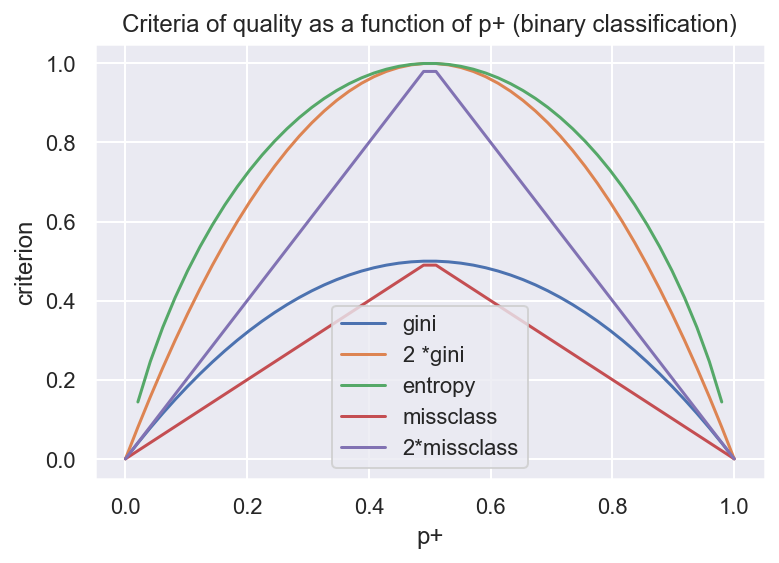

In [4]:
plt.plot(xx, [2  * x * (1-x) for x in xx], label = 'gini')
plt.plot(xx, [4  * x * (1-x) for x in xx], label = '2 *gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1-x) for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label="missclass")
plt.plot(xx, [2 - 2 * max(x, 1 - x) for x in xx], label="2*missclass")

plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend();

In [5]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
# add the set the mean to 2 on train_data
# add the 1 on train_labels
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

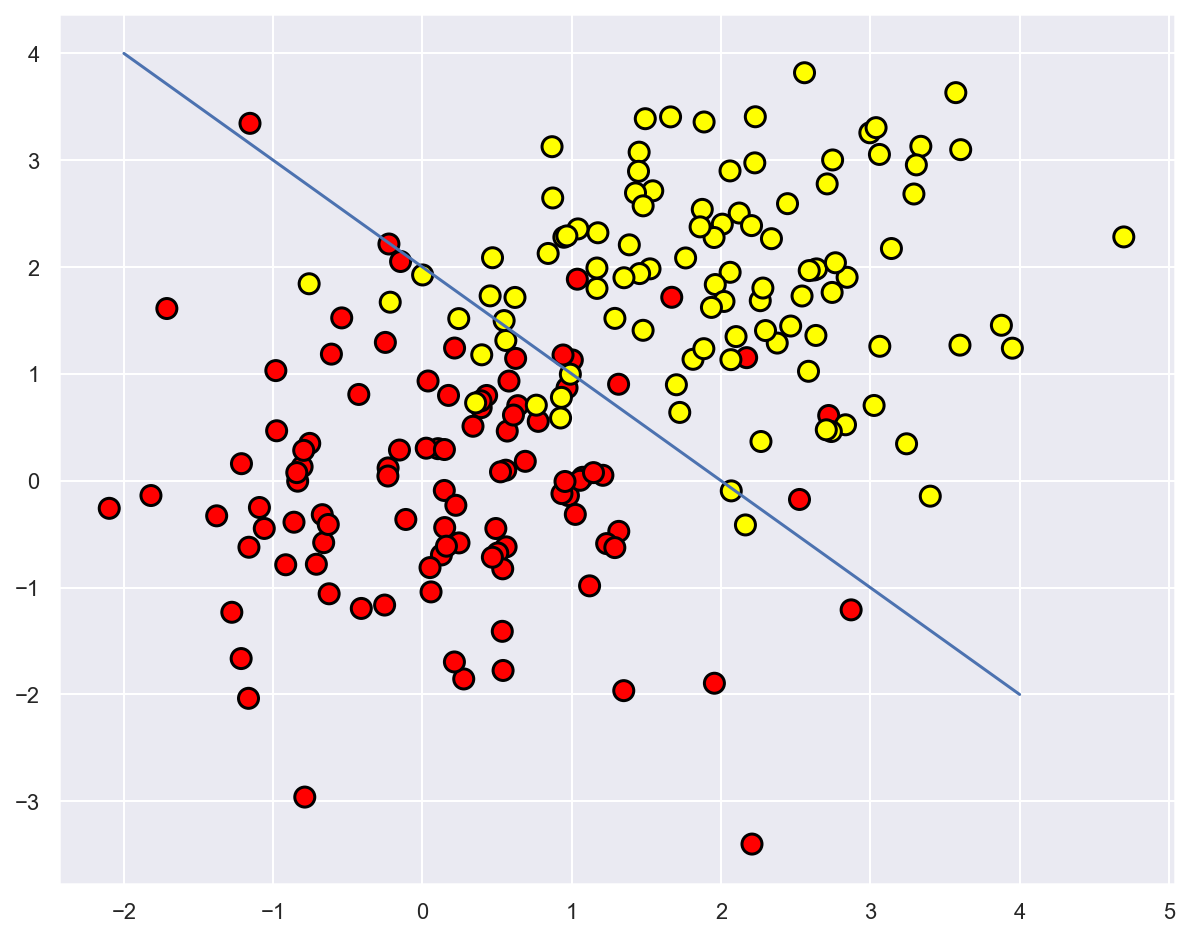

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

Let's try to separate these two classes by training an Sklearn decision tree. We will use max_depth parameter that limits the depth of the tree. Let's visualize the resulting separating boundary.

In [7]:
from sklearn.tree import DecisionTreeClassifier

def get_grid(data):
    x_min, x_max = data[:,0].min()-1, data[:,0].max()+1
    y_min, y_max = data[:,1].min()-1, data[:,1].max()+1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    

In [8]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

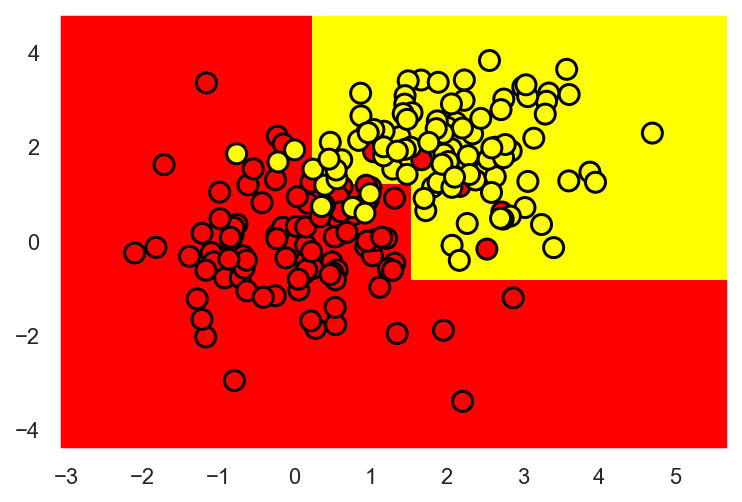

In [9]:
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:,0], train_data[:,1],
           c = train_labels, s=100, cmap='autumn',
           edgecolors = 'black', linewidth=1.5)

And how does the tree itself look? We see that the tree "cuts" the space into 8 rectangles, i.e. the tree has 8 leaves. Within each rectangle, the tree will make the prediction according to the majority label of the objects inside it.

In [10]:
!pip install pydotplus

In [11]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz


def tree_graph_to_png(tree, feature_names, png_file_to_save):
    """
    This requires GraphViz to be installed.  
    """
    
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [12]:
tree_graph_to_png(
    tree=clf_tree,
    feature_names=["x1", "x2"],
    png_file_to_save="topic3_decision_tree1.png",
)

In [13]:
"""

plt.figure(figsize=(20, 20))
from sklearn import tree
tree.plot_tree(clf_tree.fit(train_data, train_labels))

"""

'\n\nplt.figure(figsize=(20, 20))\nfrom sklearn import tree\ntree.plot_tree(clf_tree.fit(train_data, train_labels))\n\n'

In [14]:
data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [15]:
data.sort_values(by='Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [16]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)

tree_graph_to_png(
    age_tree,
    feature_names=["Age"],
    png_file_to_save="topic3_decision_tree2.png",
)

## numpy.ravel

numpy.ravel(array, order = 'C')


array : [array_like]Input array. 
order : [C-contiguous, F-contiguous, A-contiguous; optional]   

### C : row-wise
### F : column-wise
         
-         C-contiguous order in memory(last index varies the fastest)
         C order means that operating row-rise on the array will be slightly quicker
-         FORTRAN-contiguous order in memory (first index varies the fastest).
-         F order means that column-wise operations will be faster. 
-         ‘A’ means to read / write the elements in Fortran-like index order if,
         array is Fortran contiguous in memory, C-like order otherwise

In [17]:
# row-wise
array = [[1, 2, 3], [10, 20, 30]]
np.ravel(array, order='C')

array([ 1,  2,  3, 10, 20, 30])

In [18]:
# column-wise
array = [[1, 2, 3], [10, 20, 30]]
np.ravel(array, order='F')

array([ 1, 10,  2, 20,  3, 30])

### np.random
Draw random samples from a normal (Gaussian) distribution.

random.normal(loc=0.0, scale=1.0, size=None)

- (mean, std, output shape)

- shape If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn

In [19]:
# first class
np.random.seed(42)
first = np.random.normal(10, 1, size=(100, 2))
label1= np.zeros(100)
second = np.r_[first, np.random.normal(13, 10, size=(100, 2))]
label2 = np.r_[label1, np.ones(100)]

In [20]:
first[:10]

array([[10.49671415,  9.8617357 ],
       [10.64768854, 11.52302986],
       [ 9.76584663,  9.76586304],
       [11.57921282, 10.76743473],
       [ 9.53052561, 10.54256004],
       [ 9.53658231,  9.53427025],
       [10.24196227,  8.08671976],
       [ 8.27508217,  9.43771247],
       [ 8.98716888, 10.31424733],
       [ 9.09197592,  8.5876963 ]])

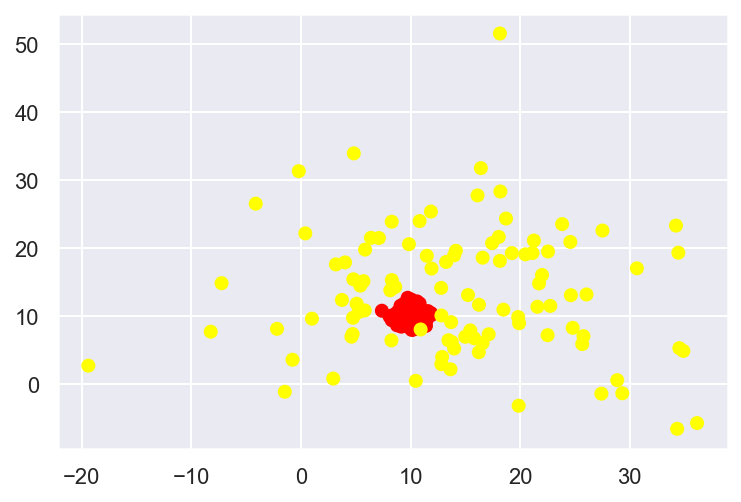

In [21]:
plt.scatter(second[:,0], second[:,1], c= label2, cmap='autumn')

### np.r_
What it does is row-wise merging. This post has some nice example:

In [22]:
V = [1,2,3,4,5,6 ]
Y = [7,8,9,10,11,12]
np.r_[V[0:2],Y[0],V[3],Y[1:3],V[4:],Y[4:]]

array([ 1,  2,  7,  4,  8,  9,  5,  6, 11, 12])

## np.arange

numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)

In [23]:
np.arange(0, 5, 0.5, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
np.arange(0, 5, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [25]:
ar= np.arange(5)
ar

array([0, 1, 2, 3, 4])

In [26]:
ar = [ n for n in range(5)]
ar

[0, 1, 2, 3, 4]

The built-in range generates Python built-in integers that have arbitrary size, while numpy.arange produces numpy.int32 or numpy.int64 numbers. This may result in incorrect results for large integer values:

In [27]:
power = 40
modulo = 10000
x1 = [(n ** power) % modulo for n in range(8)]
x2 = [(n ** power) % modulo for n in np.arange(8)]

In [28]:
x1, x2

([0, 1, 7776, 8801, 6176, 625, 6576, 4001],
 [0, 1, 7776, 7185, 0, 5969, 4816, 3361])

## np.meshgrid

The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.

In [29]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
xv, yv

(array([[0. , 0.5, 1. ],
        [0. , 0.5, 1. ]]),
 array([[0., 0., 0.],
        [1., 1., 1.]]))

https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy

In [30]:
xvalues = np.array([0, 1, 2, 3, 4])
yvalues = np.array([0, 1, 2, 3, 4])

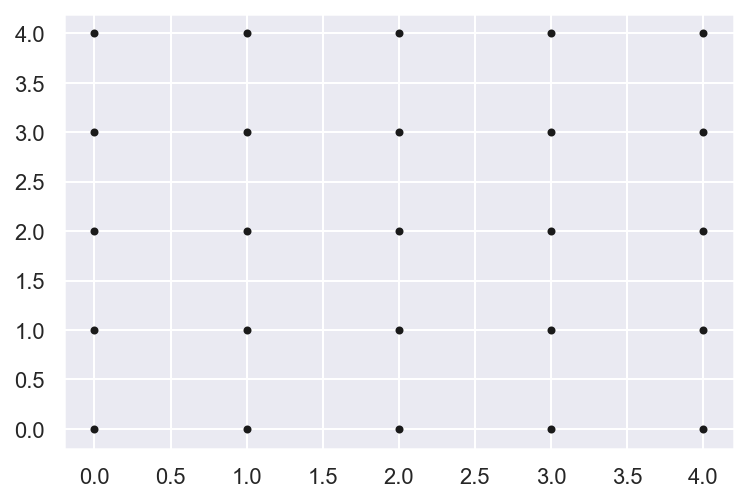

In [31]:
xx, yy = np.meshgrid(xvalues, yvalues)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')